In [2]:
import matplotlib.pyplot as plt
import math

In [3]:
#Call
call=[[260,17.55],[265,14.8],[270,11.95],[275,9.55],[280,7.7]]

#Put
put=[[260,5],[265,6.7],[270,8.85],[275,11.6],[280,14.55]]

# Current Price

s0=272.45

In [4]:
# TATAMOTORS

#Call
call=[[160,21],[165,18.2],[170,14],[175,10.95],[180,8.6]]

#Put
put=[[160,2.65],[165,3.8],[170,5.55],[175,7.5],[180,10]]

# Current Price

s0 = 178.85

In [15]:
def r2r_payoff(strike,call,put,s0):
    
    x=[]
    y=[]

    for i in range(0,strike+100):
        x.append(i)
        if i<=strike:
            y.append(strike - i - call - put)
        elif i>=strike:
            y.append(i - strike - call - put)
#     25 is the calibration factor for normalising
    return [round(25*(((call+put)/(s0+strike))**2) - abs(strike - s0)/(strike),2),strike,call,put,s0]

def payoff_plot(strike,call,put,s0):
    x=[]
    y=[]

    for i in range(strike-1000,strike+1000):
        x.append(i)
        if i<=strike:
            y.append(strike - i - call - put)
        elif i>=strike:
            y.append(i - strike - call - put)

    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    plt.axvline(strike,ls=":",color="green")
    plt.text(strike,0,round(strike,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    
    plt.axvline(s0,ls=":",color="red")
    plt.text(s0,0,s0,horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(min(y),ls=":",label=round(min(y),2))
    plt.axhline(0,color="k",ls=":")
    plt.axvline(strike-call-put,color="k")
    plt.text(strike-call-put,0,round(strike-call-put,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    plt.axvline(strike+call+put,color="k")
    plt.text(strike+call+put,0,round(strike+call+put,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payout")
    plt.legend(loc=5)

[160, 21, 2.65, 178.85]


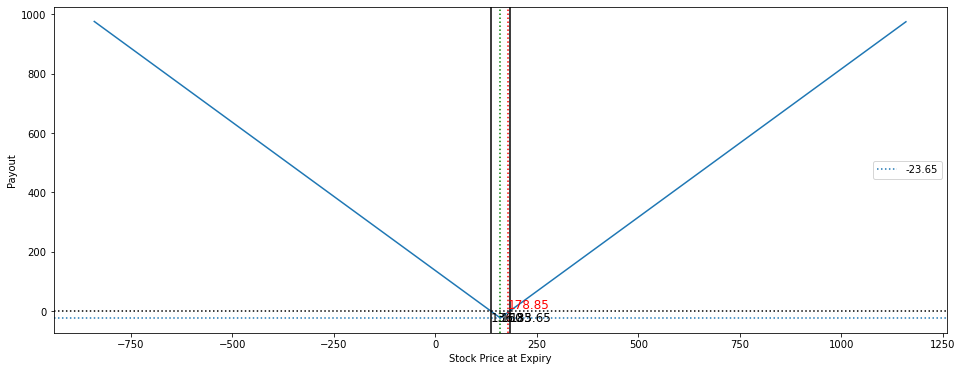

In [16]:
l = len(call)

opti=[math.inf,0,0]

for i in range(l):
    strike=call[i][0]
    c=call[i][1]
    p=put[i][1]
    r2r=r2r_payoff(strike,c,p,s0)
    if opti[0]>r2r[0]:
        opti=r2r

print(opti[1:])

payoff_plot(opti[1],opti[2],opti[3],opti[4])


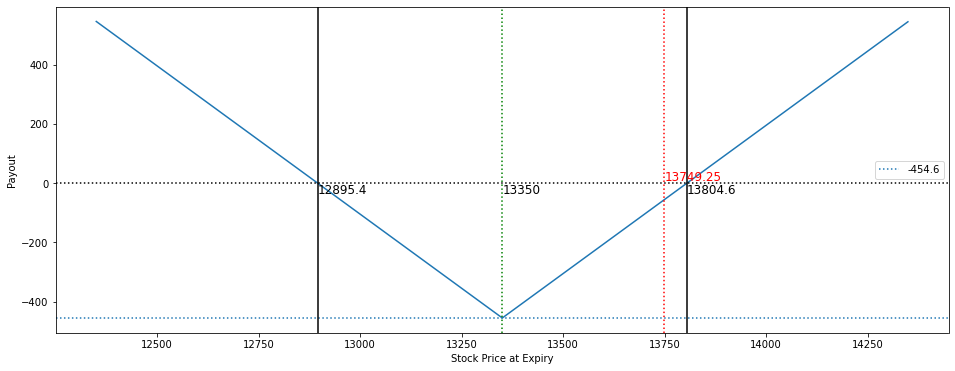

In [28]:
payoff_plot(13350,431.15,23.45,13749.25)